In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import svm

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.io as sio

# Gaussian Kernel Function, or Radial Basis Function

In [105]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(- np.power(x1 - x2, 2).sum() / (2 * (sigma ** 2)))

Calculate a sample kernel value with the above RBF, when $sigma = 2$: 

In [106]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# Loading Dataset 

In [107]:
mat = sio.loadmat('e:/ex6data2.mat')
print(mat.keys())
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data['y'] = mat.get('y')

data.head(5)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


Print dataframe dimensions (should be 863x3 matrix):

In [108]:
data.shape

(863, 3)

#  Visualizing Dataset 2

As we can see, we must find a non-linear decision boundrary.

Text(0, 0.5, 'X2')

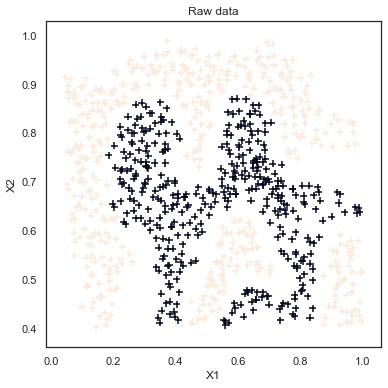

In [109]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], marker = '+')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# scikit-learn Gaussian Kernel

## Set up the kernel: 

In [110]:
svc = svm.SVC(C=1, kernel='rbf', gamma=1, probability=True)
svc

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Score for fitting data with Gaussian Kernel is:

In [111]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.8088064889918888

## SVM decision boundry visualization using `predict_proba` from `svm.SVC` library. 

In [112]:
prediction_prob = svc.predict_proba(data[['X1', 'X2']])[:, 0]

Text(0, 0.5, 'X2')

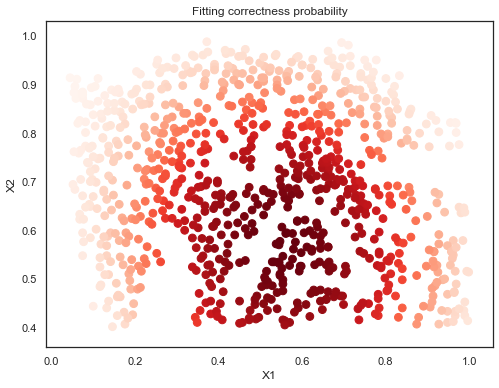

In [113]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=60, c=prediction_prob, cmap='Reds')
ax.set_title('Fitting correctness probability')
ax.set_xlabel('X1')
ax.set_ylabel('X2')